<img src="./files/universidad-nebrija.jpg" alt="Logo Nebrija" align="right" width=200>


<h2><font color="#004D7F" size=4>Lenguajes de Programación</font></h2>

<h1><font color="#004D7F" size=5>Introducción a Qiskit</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>José Javier Paulet González</font><br>
<font color="#004D7F" size=3>16/02/2023</font><br>
<font color="#004D7F" size=3>Universidad Antonio de Nebrija</font>

</div>


$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
---

<h1><font color="#004D7F" size=15>¿Qué es Qiskit?</font></h1>

 - Qiskit es un kit de desarrollo software **(SDK)**, **open source** y creado por **IBM**, para trabajar con ordenadores cuánticos a nivel de **circuitos**, **pulsos** y **algoritmos**.
 - Qiskit permite desarrollar software cuántico tanto a nivel de código máquina **(OpenQASM)** como a niveles más altos sin necesitar experiencia en computación cuántica.

<h1><font color="#003D7F" size=5>Componentes</font></h1>


<figure>
  <img src="./files/qiskit-framework.png" alt="Qiskit elements" width=700>
  <center><figcaption>Fuente: <a href="https://qiskit.org">https://qiskit.org</a></figcaption></center>
</figure>

Los 4 componentes de Qiskit principales son:
   - **Terra**: Este componente es el componente principal del que todos los demás dependen. Proporciona herramientas para:
     - Crear programas cuánticos al nivel de circuitos o pulsos
     - Optimizar programas cuánticos dependiendo del dispositivo en el que se vaya a ejecutar.
     - Gestionar las ejecuciones en dispositivos remotos.
     - Visualizar los programas cuánticos y los resultados de ejecutar dichos programas cuánticos
   - **Aer**: Este componente proporciona la parte de la simulación de Qiskit, con un alto rendimiento y con modelo de ruido realistas. Aer proporciona 3 simuladores de alto rendimiento:
     - **QasmSimulator**: Permite la ejecución de circuitos y devuelve el resultado de las medidas realizadas.
     - **StatevectorSimulator**: Permite la ejecución de circuitos una sola vez y devuelve el vector final tras la ejecución.
     - **UnitarySimulator**: Permite la ejecución una sola vez y devuelve la matriz final tras la ejecución.
   - **Aqua**: Este componente proporcionaba un conjunto de algoritmos para construir aplicaciones de diferentes dominios. Ya se le ha dejado de dar soporte y ahora se ha dividido en los componentes **Qiskit Optimization**, **Qiskit Finance**, **Qiskit Machine Learning** y **Qiskit Nature**.
   - **Ignis**: Actualmente está obsoleto y algunas de sus funcionalidades se han migrado a **Qiskit Terra** y **Qiskit Experiments**. Este componente estaba dedicado a:
     - Verficación de hardware cuántico.
     - Corrección de errores.
     - Caracterización del riudo.


En esta asignatura vamos a utilizar **Terra** y **Aer**.

<h1><font color="#003D7F" size=5>Ejemplo de un circuito cuántico</font></h1>

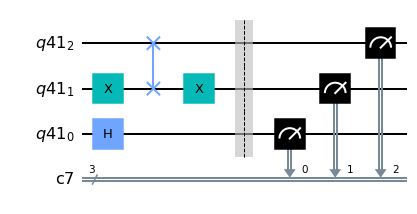

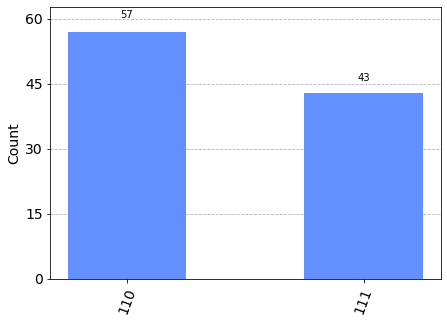

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')
circ.x(qreg[1])
circ.swap(qreg[1], qreg[2])
circ.h(qreg[0])
circ.x(qreg[1])
circ.barrier()

#Añadimos las medidas
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(circ, Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(circ)

#Mostramos los resultados
plot_histogram(counts)

<h1><font color="#003D7F" size=5>Pasos para la creación y ejecución de un circuito</font></h1>

Los pasos son los siguientes:
   1. Importar los módulos necesarios para nuestro circuito.
   2. Crear los **registros de qubits** necesarios para el circuito.
   3. Crear los **registros de bits** necesarios para el circuito.
   4. Crear el circuito, incluyendo los registros creados anteriormente, con **QuantumCircuit()**.
   5. Añadimos las puertas y operadores necesarios al circuito.
   6. Añadimos las medidas a los qubits del registro de qubits que queramos medir y lo volcamos en los bits de los registros de bits que deseemos.
   7. Mostramos el circuito **(Opcional)**.
   8. Ejecutamos el circuito en un computador real o en un simulador de los disponibles.
   9. Mostramos los resultados.

<h1><font color="#003D7F" size=5>Registros cuánticos</font></h1>

Para crear un registro cuántico se utiliza la función **QuantumRegister(size, name)**:
   - **size**: Número entero que indica el tamaño del registro.
   - **name**: String que indica el nombre del registro. El nombre debe cumplir las restricciones de los nombres de variables de **OpenQASM**. **(Opcional)**

In [27]:
from qiskit import QuantumRegister

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3, name="registro_cuantico_1")

<h1><font color="#003D7F" size=5>Registros clásicos</font></h1>

Para crear un registro clásico se utiliza la función **ClassicalRegister(size, name)**:
   - **size**: Número entero que indica el tamaño del registro.
   - **name**: String que indica el nombre del registro. El nombre debe cumplir las restricciones de los nombres de variables de **OpenQASM**. **(Opcional)**

In [28]:
from qiskit import ClassicalRegister

#Creamos el registro clásico de bits
creg = ClassicalRegister(3, name="registro_clasico_1")

<h1><font color="#003D7F" size=5>Circuitos cuánticos</font></h1>

Para crear un circuito cuántico se utiliza la función **QuantumCircuit(*regs, name)**:
   - ***regs**: Lista de registros que se van a incluir en el circuito.
   - **name**: String que indica el nombre del circuito. **(Opcional)**

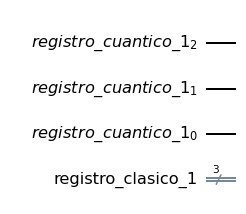

In [29]:
from qiskit import QuantumCircuit

#Creamos el circuito y añadimos los registros
circ = QuantumCircuit(qreg, creg, name="Circuito de ejemplo")
display(circ.draw(output='mpl', reverse_bits=True))

<h1><font color="#003D7F" size=5>Puertas disponibles</font></h1>

La lista de puertas cuánticas disponibles en qiskit son:
   - Puertas de 1 qubit:
     - **.x(qubit)**: Aplica la puerta **X** al qubit _qubit_.
     - **.y(qubit)**: Aplica la puerta **Y** al qubit _qubit_.
     - **.z(qubit)**: Aplica la puerta **Z** al qubit _qubit_.
     - **.h(qubit)**: Aplica la puerta **Hadamard** al qubit _qubit_.
     - **.rx($\phi$, qubit)**: Realiza una rotación de $\phi$ en el eje **X**  al qubit _qubit_.
     - **.ry($\phi$, qubit)**: Realiza una rotación de $\phi$ en el eje **Y**  al qubit _qubit_.
     - **.rz($\phi$, qubit)**: Realiza una rotación de $\phi$ en el eje **Z**  al qubit _qubit_.
     - **.i(qubit)**: Aplica la puerta **I** al qubit _qubit_.
     - **.s(qubit)**: Aplica la puerta **$\sqrt{Z}$** al qubit _qubit_.
     - **.sdg(qubit)**: Aplica la puerta **$\sqrt{Z}^{\dagger}$** al qubit _qubit_.
     - **.t(qubit)**: Aplica la puerta **$\sqrt[\leftroot{-2}\uproot{3}4]{Z}$** al qubit _qubit_.
     - **.tdg(qubit)**: Aplica la puerta **$\sqrt[\leftroot{-2}\uproot{3}4]{Z}^{\dagger}$** al qubit _qubit_.
     - **.u($\theta$, $\phi$, $\lambda$, qubit)**: Aplica la matriz: 
   
   \begin{equation}
\begin{pmatrix}
\cos{\frac{\theta}{2}} & -e^{i\lambda}\sin{\frac{\theta}{2}}\\
e^{i\phi}\sin{\frac{\theta}{2}} & e^{i\left(\phi+\lambda\right)}\cos{\frac{\theta}{2}}
\end{pmatrix}
\end{equation}


   - Puertas de 2 qubits
     - **.cx(control_qubit, target_qubit)**: Aplica una puerta **X** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.cy(control_qubit, target_qubit)**: Aplica una puerta **Y** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.cz(control_qubit, target_qubit)**: Aplica una puerta **Z** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.ch(control_qubit, target_qubit)**: Aplica una puerta **Hadamard** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.crz($\phi$, control_qubit, target_qubit)**: Aplica una puerta **$R_{z}\left(\phi\right)$** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.cu3($\theta$, $\phi$, $\lambda$, control_qubit, target_qubit)**: Aplica una puerta **$U\left(\theta, \phi, \lambda\right)$** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.swap(qubit1, qubit2)**: Intercambia los qubits _qubit1_ y _qubit2_.
   - Puertas de 3 qubits:
     - **.ccx(control_qubit1, control_qubit2, target_qubit)**: También llamada **Toffoli**, es la puerta **X** controlada por 2 qubits.
     - **.cswap(control_qubit, qubit1, qubit2)**: Realiza un intercambio controlado por el qubit _control_qubit_ entre los qubits _qubit1_ y _qubit2_.
   - Operaciones no unitarias:
     - **.measure(qubit, cbit)**: Mide el qubit o lista de qubits _qubit_ y vuelca el resultado en el bit o lista de bits _cbit_.
   - Operaciones condicionales:
     - Para aplicar una puerta de manera condicional se realiza de la siguiente forma:
       - **.gate(args).c_if(creg, value)**: Aplica la puerta _gate_ si el valor del registro _creg_ es igual al valor _value_.
      

<h1><font color="#003D7F" size=5>Ejemplo de un circuito simple</font></h1>

In [30]:
from qiskit import QuantumCircuit

#Creamos el circuito y añadimos los registros
circ = QuantumCircuit(qreg, creg, name="Circuito de ejemplo")
circ.ch(qreg[1], qreg[0])
circ.x(qreg[2])
circ.z(qreg[0])
circ.cswap(qreg[2], qreg[1], qreg[0])
circ.measure(qreg[1], creg[0])
circ.ry(2.44, qreg[2]).c_if(creg, 5)

<h1><font color="#003D7F" size=5>Dibujar el circuito</font></h1>

Para visualizar el circuito se usa el método de la clase **QuantumCircuit** _.draw()_. Para visualizar arriba los qubits más significativos y abajo los qubits menos significativos le añadimos el argumento **reverse_bits=True**.

In [31]:
display(circ.draw(reverse_bits=True))

┌───┐           ┌──────────┐
registro_cuantico_1_2: ┤ X ├──────■────┤ Ry(2.44) ├
                       └───┘      │ ┌─┐└────╥─────┘
registro_cuantico_1_1: ──■────────X─┤M├─────╫──────
                       ┌─┴─┐┌───┐ │ └╥┘     ║      
registro_cuantico_1_0: ┤ H ├┤ Z ├─X──╫──────╫──────
                       └───┘└───┘    ║   ┌──╨──┐   
 registro_clasico_1: 3/══════════════╩═══╡ 0x5 ╞═══
                                     0   └─────┘

Para visualizarlo de manera más agradable podemos usar **Matplotlib**, para ello se lo indicamos con el argumento **output='mpl'**.

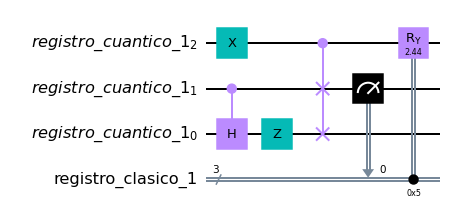

In [7]:
display(circ.draw(output='mpl', reverse_bits=True))

<h1><font color="#003D7F" size=5>Mediciones</font></h1>

Para medir un qubit o un registro de qubits se utiliza el método:
 - **.measure(qubit, cbit)**: Mide el qubit o lista de qubits _qubit_ y vuelca el resultado en el bit o lista de bits _cbit_.
 
Para llevarlas a cabo tenemos que ejecutar el circuito en el simulador **qasm_simulator**, incluido en el componente **Aer**, e indicar el número de ejecuciones que se desean. Esto se consigue con la sentencia:
 - **execute(circ, Aer.get_backend('qasm_simulator'),shots=n_shots)**: **circ** es el circuito cuántico creado y **n_shots** el número de veces que se desea ejecutar.

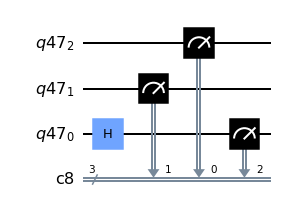

{'100': 48, '000': 52}


In [32]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')

circ.h(qreg[0])

#Añadimos las medidas y las volcamos en orden inverso
circ.measure(qreg[:], creg[-1:-4:-1])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(circ, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts(circ)

print(counts)

<h1><font color="#003D7F" size=5>Visualización de los resultados</font></h1>

Para la visualización de las mediciones podemos usar la función **plot_histogram(counts)** del módulo **qiskit.visualization**, donde **counts** es el diccionario resultante de las mediciones.

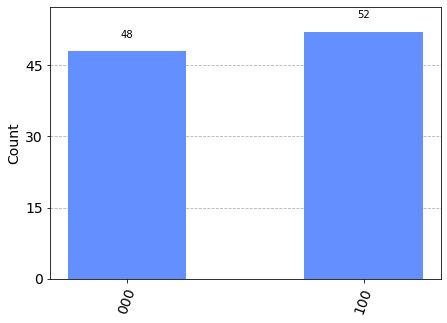

In [9]:
#Mostramos los resultados
plot_histogram(counts)

<h1><font color="#003D7F" size=5>Orden y representación de los registros y puertas</font></h1>

Por defecto **Qiskit** muestra el circuito con los qubits menos significativos arriba y los más significativos abajo. También al aplicar un operador de varios qubits los aplica por defecto de menos significativos a más significativos. Nosotros vamos a aplicar el orden inverso para que haya una coherencia de las fórmulas matemáticas con los dibujos de los circuitos:
<img src="./files/order-explanation.gif" alt="Order explanation" width="700" />

<h1><font color="#003D7F" size=5>OpenQASM en Qiskit</font></h1>

Podemos crear circuitos cuánticos a partir de código o ficheros **OpenQASM**. También podemos exportar el circuito creado a código **OpenQASM**. Para ello se utilizan los siguientes métodos de la clase **QuantumCircuit**:
 - **.from_qasm_file(path)**: Esta función importa un circuito cuántico a partir de un fichero **OpenQASM** que se encuentra en la ruta **path**.
 - **.from_qasm_str(qasm_str)**: Esta función crea un circuito cuántico a partir de una cadena de caracteres de código **OpenQASM**, donde **qasm_str** es dicha cadena.
 - **.qasm()**: Devuelve una cadena de caracteres con el circuito cuántico en **OpenQASM**.

### Creación de un circuito a partir de una cadena de caracteres

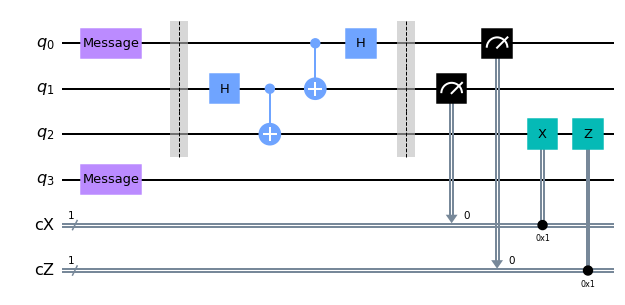

In [33]:
from qiskit import QuantumCircuit

qasm_code = '''
        OPENQASM 2.0;
        include "qelib1.inc";
        gate message a {
          u3(pi/8, pi/3, 2.22) a;
        }

        qreg q[4];
        creg cX[1];
        creg cZ[1];

        message q[0];
        barrier q[0],q[1],q[2];
        h q[1];
        cx q[1],q[2];
        cx q[0],q[1];
        h q[0];
        barrier q[0],q[1],q[2];

        measure q[1] -> cX[0];
        measure q[0] -> cZ[0];
        if (cX==1) x q[2];
        if (cZ==1) z q[2];

        message q[3];'''

#Creamos el circuito
circ = QuantumCircuit.from_qasm_str(qasm_code)

#Mostramos el circuito
display(circ.draw(output='mpl'))

### Exportar un circuito a OpenQASM

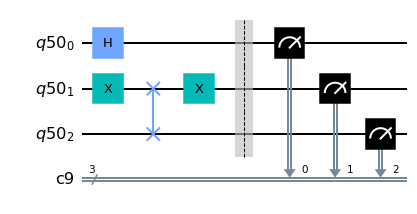

OPENQASM 2.0;
include "qelib1.inc";
qreg q50[3];
creg c9[3];
x q50[1];
swap q50[1],q50[2];
h q50[0];
x q50[1];
barrier q50[0],q50[1],q50[2];
measure q50[0] -> c9[0];
measure q50[1] -> c9[1];
measure q50[2] -> c9[2];



In [34]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')
circ.x(qreg[1])
circ.swap(qreg[1], qreg[2])
circ.h(qreg[0])
circ.x(qreg[1])
circ.barrier()

#Añadimos las medidas
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl'))

#Exportamos el circuito
print(circ.qasm())

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>

Probar el circuito en <a href="https://quantum-computing.ibm.com/composer/files/new">IBM Composer</a>

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>

Importar el circuito de Grover de la sesión de OpenQASM y visualizarlo. El circuito se encuentra en el directorio _files_.

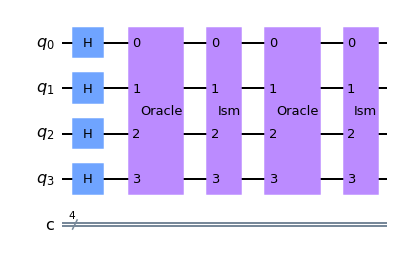

In [35]:
from qiskit import QuantumCircuit

#Creamos el circuito
circ = QuantumCircuit.from_qasm_file("./files/grover_sol.qasm")


#Mostramos el circuito
display(circ.draw(output='mpl'))

Para visualizar las puertas que hay dentro de los operadores podemos usar la función **.decompose()** que tiene la clase **QuantumCircuit**.

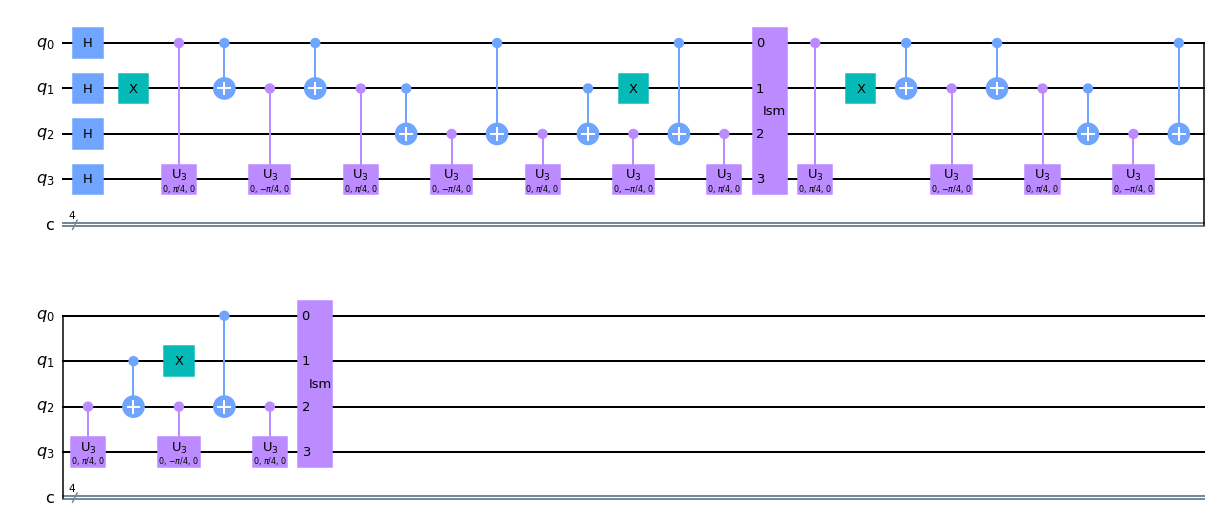

In [42]:
display(circ.decompose(gates_to_decompose=['Oracle']).draw(output='mpl'))

<h1><font color="#003D7F" size=5>Primeros pasos</font></h1>

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>

Crea un par EPR, mide los 2 qubits y muestra los resultados con un diagrama de barras.

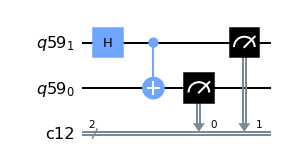

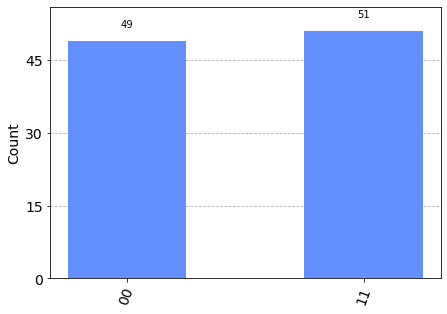

In [45]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(2)

#Creamos el registro clásico de bits
creg = ClassicalRegister(2)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg)

circ.h(qreg[1])
circ.cx(qreg[1], qreg[0])

#Añadimos las medidas y las volcamos en orden inverso
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))


#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(circ, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts(circ)

#Mostramos los resultados
plot_histogram(counts)

<h1><font color="#003D7F" size=5>Creación de puertas y operadores</font></h1>

Vamos a usar 2 formas de contruir puertas y operadores:
  - A partir de una matriz: Para ello construimos la matriz unitaria con **Numpy** y se la pasamos como parametro al constructor **UnitaryGate** que se encuentra en el módulo **qiskit.extensions**. Una vez la tenemos creada la podemos añadir a un circuito con el método **.append(gate, qubits)** donde _gate_ es la puerta creada y _qubits_ es una lista con los qubits a los que se quiere aplicar (tiene que ser del mismo tamaño que el tamaño de la puerta).
  - Por composición de circuitos: Esta forma de crear operadores es crear circuitos e ir añadiendolos al circuito principal mediente el método **.append(circuit, qubits)** donde _circuit_ es el circuito del operador que hemos creado y _qubits_ 

### A partir de una matriz

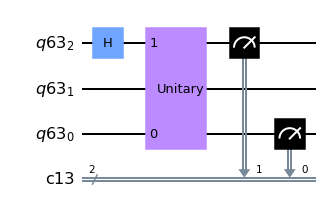

{'00': 52, '11': 48}


In [46]:
from qiskit.extensions import UnitaryGate
import numpy as np
%run files/aux_func.py

cnot_matrix = controlled_e_u(X, 1)


cnot_gate = UnitaryGate(cnot_matrix)

qreg = QuantumRegister(3)
creg = ClassicalRegister(2)
circ = QuantumCircuit(qreg, creg) 


#ism_ctrl = ism_3_gate.control(1, 'Controlled ISM', 1)
circ.h(2)
circ.append(cnot_gate, [0, 2])

circ.measure(qreg[2], creg[1])
circ.measure(qreg[0], creg[0])

display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(circ, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts(circ)

print(counts)

### Composición de circuitos

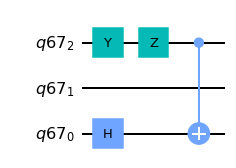

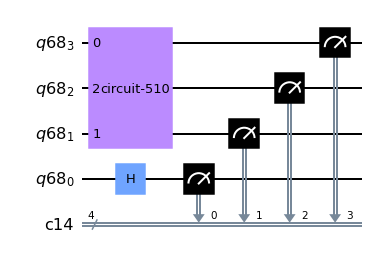

{'0101': 28, '1101': 26, '0100': 29, '1100': 17}


In [47]:
from qiskit.extensions import UnitaryGate
import numpy as np

#Creación del operador
qreg1 = QuantumRegister(3)
circuit_operator = QuantumCircuit(qreg1) 

circuit_operator.y(2)
circuit_operator.z(2)
circuit_operator.h(0)
circuit_operator.cx(2, 0)
display(circuit_operator.draw(output='mpl', reverse_bits=True))


#Creación del circuito principal
qreg2 = QuantumRegister(4)
creg2 = ClassicalRegister(4)
circ = QuantumCircuit(qreg2, creg2) 

circ.h(0)
circ.append(circuit_operator, [3, 1, 2])

circ.measure(qreg2, creg2)

display(circ.draw(output='mpl', reverse_bits=True))

#display(circ.decompose().draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(circ, Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(circ)

print(counts)

<h1><font color="#003D7F" size=5>Puertas multicontroladas</font></h1>

Las 2 principales puertas multicontroladas que vamos a usar son:
  - **.mcx(control_qubits, target_qubit)**: Esta puerta es una puerta **X** multicontrolada, donde _control_qubits_ es una lista con los qubits de control y _target_qubit_ es el qubit al que se le aplica la puerta.
  - **.mcmt(gate, num_ctrl_qubits, num_target_qubits)**: Aplica una puerta _gate_ a un número de qubits _num_target_qubits_ controlada por un número de qubits _num_ctrl_qubits_ tanto los qubits de control como los de objetivo son consecutivos y empiezan por el menos significativo.
  
También hay otra forma de crear puertas controladas, es con el método **.control(n_controls)** que tienen las puertas y circuitos donde el parámetro _n\_controls_ es el número de controles que va a tener.

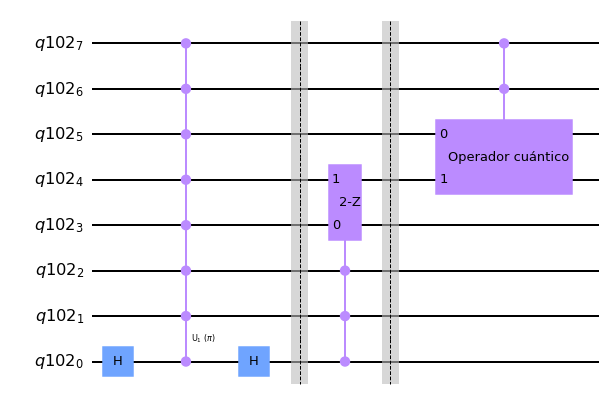

In [54]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(8)

#Creamos el circuito
circ = QuantumCircuit(qreg, name='Circuito cuántico')

#Añadimos las diferentes puertas multicontroladas
circ.mcx([7 - i for i in range(7)], 0)
circ.barrier()
circ.append(MCMT('z', num_ctrl_qubits=3, num_target_qubits=2), [i for i in range(5)])
circ.barrier()

qreg2 = QuantumRegister(2)
operator_circ = QuantumCircuit(qreg2, name='Operador cuántico')
operator_circ.h(qreg2)
operator_circ.x(1)
#Mostramos el circuito

circ.append(operator_circ.control(2), [8 - i - 1 for i in range(4)])

#Mostramos el circuito
display(circ.decompose().draw(output='mpl', reverse_bits=True))

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>

Crear la puerta $C^{5}X$ con cada uno de las 3 formas explicadas, teniendo en cuenta que los qubits de control tienen que ser los más significativos.

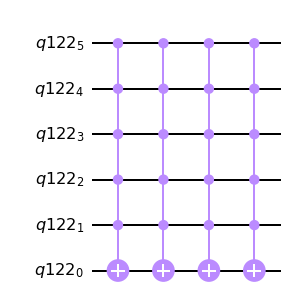

In [63]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT, XGate

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(6)

#Creamos el circuito
circ = QuantumCircuit(qreg)

#Añadimos las diferentes puertas multicontroladas
circ.mcx([5 - i for i in range(5)], 0)

circ.append(MCMT(XGate(), num_ctrl_qubits=5, num_target_qubits=1), [5 - i for i in range(6)])
circ.append(MCMT("x", num_ctrl_qubits=5, num_target_qubits=1), [5 - i for i in range(6)])


qreg2 = QuantumRegister(1)
operator_circ = QuantumCircuit(qreg2, name='X')
operator_circ.x(0)

operator_circ_cntrl = XGate().control(5)

circ.append(operator_circ_cntrl, [5 - i for i in range(6)])

#Mostramos el circuito

display(circ.decompose(gates_to_decompose=["mcmt", "c_X"]).draw(output='mpl', reverse_bits=True))

<h1><font color="#003D7F" size=5>Ejecución en un computador cuántico real</font></h1>

Para ejecutar un circuito cuántico en un computador real de IBM vamos a seguir los siguientes pasos:
  1. Obtenemos el proveedor de IBM con **IBMProvider(token=api_key)** donde _api_key_ es la credencial proporcionada por IBM.
  2. Obtenemos el computador cuántico donde queremos ejecuarlo con **.get_backend(backend_name)** donde _backend_name_ es el nombre del computador cuántico.
  3. Creamos el circuito.
  4. Ejecutamos el circuito.
  5. Mostramos los resultados.

In [19]:
#!pip install qiskit-ibm-runtime

In [20]:
from qiskit import IBMQ, assemble, transpile
from qiskit.circuit.random import random_circuit
from qiskit_ibm_provider import IBMProvider

#Enlazamos la cuenta de IBM con Qiskit
api_key = ""

provider = IBMProvider(token=api_key)

#Mostramos los backends disponibles
print(provider.backends())

[<IBMBackend('ibm_osaka')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>]


Ejecutando en  <IBMBackend('ibm_osaka')>


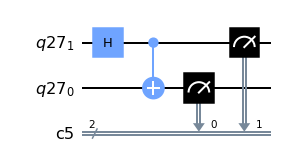

In [21]:
#Obtenemos el backend donde queremos ejecutarlo
backend_name = 'ibm_osaka'
backend = provider.get_backend(backend_name)
print("Ejecutando en ", backend)

#Creamos el circuito
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
circ = QuantumCircuit(qreg, creg) 

circ.h(1)
circ.cx(1, 0)

circ.measure(qreg, creg)

display(circ.draw(output='mpl', reverse_bits=True))

In [22]:
from qiskit.providers.jobstatus import JobStatus


transpiled_circ = transpile(circ, backend=backend)
job = backend.run(transpiled_circ, shots=1000)

try:
    job_status = job.status()  # Query the backend server for job status.
    print(job, job_status)
    if job_status is JobStatus.RUNNING:
        print("The job is still running")
except IBMJobApiError as ex:
    print("Something wrong happened!: {}".format(ex))

<IBMCircuitJob('cq7s90m7fy8g008g1xbg')> JobStatus.QUEUED


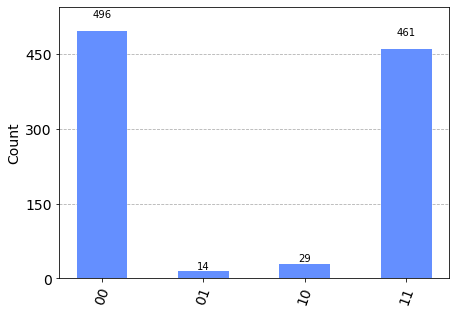

In [64]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Initialize the account first.
service = QiskitRuntimeService()
 
job_id = "cq7s90m7fy8g008g1xbg"
job = service.job(job_id)

counts = job.result().get_counts()

#Mostramos los resultados
plot_histogram(counts)

<h1><font color="#004D7F" size=5>Ejercicios</font></h1>

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>

Crear la puerta $C^{3}X$ haciendo uso de **Numpy** para calcular **V** y siguiendo el esquema siguiente:

<img src="./files/cccu.png" alt="Qiskit elements" width=700>

Con $U=X$, $V=\sqrt[\leftroot{-2}\uproot{3}4]{U}$ y:
   \begin{equation}\sqrt[\leftroot{-2}\uproot{3}n]{X}=\frac{1}{2}
\begin{pmatrix}
1+e^{\frac{i\pi}{n}} & 1-e^{\frac{i\pi}{n}}\\
1-e^{\frac{i\pi}{n}} & 1+e^{\frac{i\pi}{n}}
\end{pmatrix}
\end{equation}

Ayuda: $e^x$ en numpy es numpy.exp(x).

<a href="https://arxiv.org/pdf/quant-ph/9503016.pdf">Fuente de la imagen</a>

[[0.85355339+0.35355339j 0.14644661-0.35355339j]
 [0.14644661-0.35355339j 0.85355339+0.35355339j]]


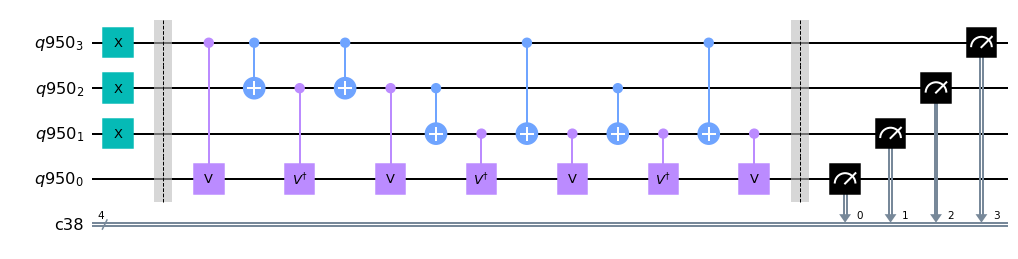

{'1111': 1000}


In [90]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
import numpy as np

#Creamos la puerta V y V_gagger
n = 4
v_matrix = (1 / 2) * np.matrix([[1 + np.exp((1j * np.pi) / n), 1 - np.exp((1j * np.pi) / n)], [1 - np.exp((1j * np.pi) / n), 1 + np.exp((1j * np.pi) / n)]])
v_gate = UnitaryGate(v_matrix, "V")
v_gate_dg = UnitaryGate(v_matrix.H, "$V^{\dagger}$")

v_gate_ctrl = v_gate.control(1)
v_gate_dg_ctrl = v_gate_dg.control(1)


#Creamos el registro cuántico de qubits
qreg = QuantumRegister(4)

#Creamos el registro clásico de bits
creg = ClassicalRegister(4)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg)

#Añadimos las puertas del esquema

circ.x(3)
circ.x(2)
circ.x(1)
circ.barrier()
circ.append(v_gate_ctrl, [3, 0])
circ.cx(3, 2)
circ.append(v_gate_dg_ctrl, [2, 0])
circ.cx(3, 2)
circ.append(v_gate_ctrl, [2, 0])
circ.cx(2, 1)
circ.append(v_gate_dg_ctrl, [1, 0])
circ.cx(3, 1)
circ.append(v_gate_ctrl, [1, 0])
circ.cx(2, 1)
circ.append(v_gate_dg_ctrl, [1, 0])
circ.cx(3, 1)
circ.append(v_gate_ctrl, [1, 0])

circ.barrier()
circ.measure(qreg[:], creg[:])

#Mostramos el circuito y ejecutamos el circuito con un ejemplo para ver el correcto funcionamiento
job = execute(circ, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(circ)



#Mostramos el resultado
print(v_matrix)
display(circ.draw(output='mpl', reverse_bits=True))

print(counts)